# Project Health Care Analytics
The goal of this project is to accurately predict the Length of Stay
for each patient so that the hospitals can optimize resources and function better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing datasets
train = pd.read_csv('C:\\Users\\Meghanjali\\Desktop\\Data Mining\\Meghanjali Project\\Healthcare\\train.csv')
test = pd.read_csv('C:\\Users\\Meghanjali\\Desktop\\Data Mining\\Meghanjali Project\\Healthcare\\test.csv')

# Data Exploration
# Overview of Data

In [3]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
train.info()
train.Stay.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [5]:
# NA values in train dataset
train.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    4532
Bed Grade                             113
Hospital_code                           0
Admission_Deposit                       0
Age                                     0
Visitors with Patient                   0
Severity of Illness                     0
Type of Admission                       0
patientid                               0
case_id                                 0
Ward_Facility_Code                      0
Ward_Type                               0
Department                              0
Available Extra Rooms in Hospital       0
Hospital_region_code                    0
City_Code_Hospital                      0
Hospital_type_code                      0
Stay                                    0
dtype: int64

In [6]:
# NA values in test dataset
test.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    2157
Bed Grade                              35
case_id                                 0
Age                                     0
Visitors with Patient                   0
Severity of Illness                     0
Type of Admission                       0
patientid                               0
Ward_Facility_Code                      0
Hospital_code                           0
Ward_Type                               0
Department                              0
Available Extra Rooms in Hospital       0
Hospital_region_code                    0
City_Code_Hospital                      0
Hospital_type_code                      0
Admission_Deposit                       0
dtype: int64

In [7]:
# Dimension of train dataset
train.shape

(318438, 18)

In [8]:
# Dimension of test dataset
test.shape

(137057, 17)

In [9]:
# Number of distinct observations in train dataset 
for i in train.columns:
    print(i, ':', train[i].nunique())

case_id : 318438
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 18
Department : 5
Ward_Type : 6
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 92017
City_Code_Patient : 37
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 28
Age : 10
Admission_Deposit : 7300
Stay : 11


In [10]:
# Number of distinct observations in test dataset
for i in test.columns:
    print(i, ':', test[i].nunique())

case_id : 137057
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 15
Department : 5
Ward_Type : 6
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 39607
City_Code_Patient : 37
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 27
Age : 10
Admission_Deposit : 6609


# Data Preparation

In [11]:
#Replacing NA values in Bed Grade Column for both Train and Test datssets
train['Bed Grade'].fillna(train['Bed Grade'].mode()[0], inplace = True)
test['Bed Grade'].fillna(test['Bed Grade'].mode()[0], inplace = True)

In [12]:
#Replacing NA values in  Column for both Train and Test datssets
train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0], inplace = True)
test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0], inplace = True)

In [13]:
# Label Encoding Stay column in train dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Stay'] = le.fit_transform(train['Stay'].astype('str'))

In [14]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4


In [15]:
#Imputing dummy Stay column in test datset to concatenate with train dataset
test['Stay'] = -1
df = pd.concat([train, test])
df.shape

(455495, 18)

In [16]:
#Label Encoding all the columns in Train and test datasets
for i in ['Hospital_type_code', 'Hospital_region_code', 'Department',
          'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype(str))

In [17]:
#Spearating Train and Test Datasets
train = df[df['Stay']!=-1]
test = df[df['Stay']==-1]

In [18]:
train['Stay'].unique

<bound method Series.unique of 0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64>

Text(0.5, 1.0, 'Distribution of data')

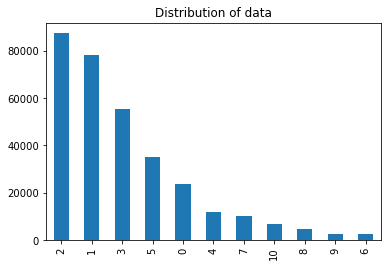

In [19]:
train['Stay'].value_counts().plot(kind='bar').set_title('Distribution of data')


#  For 2 days most of the patients will stay.
#  for 1 day and two days slight difference but more people are staying 
# Next in order 3,5,0,4,7,10,8,9,6 days

# Feature engineering 

In [20]:
def get_countid_enocde(train, test, cols, name):
  temp = train.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  temp2 = test.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  train = pd.merge(train, temp, how='left', on= cols)
  test = pd.merge(test,temp2, how='left', on= cols)
  train[name] = train[name].astype('float')
  test[name] = test[name].astype('float')
  train[name].fillna(np.median(temp[name]), inplace = True)
  test[name].fillna(np.median(temp2[name]), inplace = True)
  return train, test

In [21]:
train, test = get_countid_enocde(train, test, ['patientid'], name = 'count_id_patient')
train, test = get_countid_enocde(train, test, 
                                 ['patientid', 'Hospital_region_code'], name = 'count_id_patient_hospitalCode')
train, test = get_countid_enocde(train, test, 
                                 ['patientid', 'Ward_Facility_Code'], name = 'count_id_patient_wardfacilityCode')

In [22]:
# Droping duplicate columns
test1 = test.drop(['Stay', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)
train1 = train.drop(['case_id', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)

# Addressing the data imbalance problem by using random under sampling

In [23]:
dependent_train_df=train1['Stay']
Independent_train_df= train1.drop(columns=['Stay'])

In [24]:
Y_label = 'Stay' # Target variable
X_label = list(train1.columns) # Input variables
X_label.remove(Y_label)
# using randomunder sampling for handling data imbalance.
import imblearn
from imblearn.over_sampling import RandomOverSampler

rand_samp = RandomOverSampler()
ind_X, dep_Y = rand_samp.fit_resample(train1[X_label],train1[Y_label])
train_df=pd.concat([ind_X,dep_Y],axis=1,join="inner")
train_df



,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,count_id_patient,count_id_patient_hospitalCode,count_id_patient_wardfacilityCode,Stay
0,8,2,3,3,3,2,2.0,7.0,0,0,2,5,4911.0,14.0,4.0,5.0,0
1,2,2,5,2,3,3,2.0,7.0,1,0,2,5,5954.0,14.0,4.0,5.0,4
2,10,4,1,2,1,3,2.0,7.0,1,0,2,5,4745.0,14.0,4.0,2.0,3
3,26,1,2,2,3,2,2.0,7.0,1,0,2,5,7272.0,14.0,6.0,3.0,4
4,26,1,2,2,3,3,2.0,7.0,1,0,2,5,5558.0,14.0,6.0,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962396,19,0,7,2,3,1,3.0,8.0,0,2,16,2,6382.0,3.0,3.0,3.0,10
962397,2,2,5,3,2,3,3.0,8.0,1,2,3,7,7000.0,2.0,1.0,1.0,10
962398,22,6,9,3,2,3,2.0,8.0,1,2,6,2,5053.0,4.0,2.0,1.0,10
962399,2,2,5,3,2,3,2.0,15.0,1,2,8,5,4234.0,12.0,2.0,8.0,10


In [25]:
# Splitting train data 
X1 = train_df.drop('Stay', axis =1)
y1 = train_df['Stay']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size =0.20, random_state =100)

Text(0.5, 1.0, 'Distribution of data')

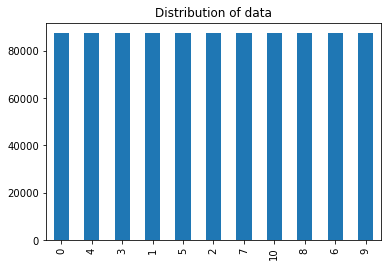

In [26]:
train_df['Stay'].value_counts().plot(kind='bar').set_title('Distribution of data')

In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Exploring the correlation matrix to understand which factors are positively correlated

In [28]:
matrix=test.corr().round(2)

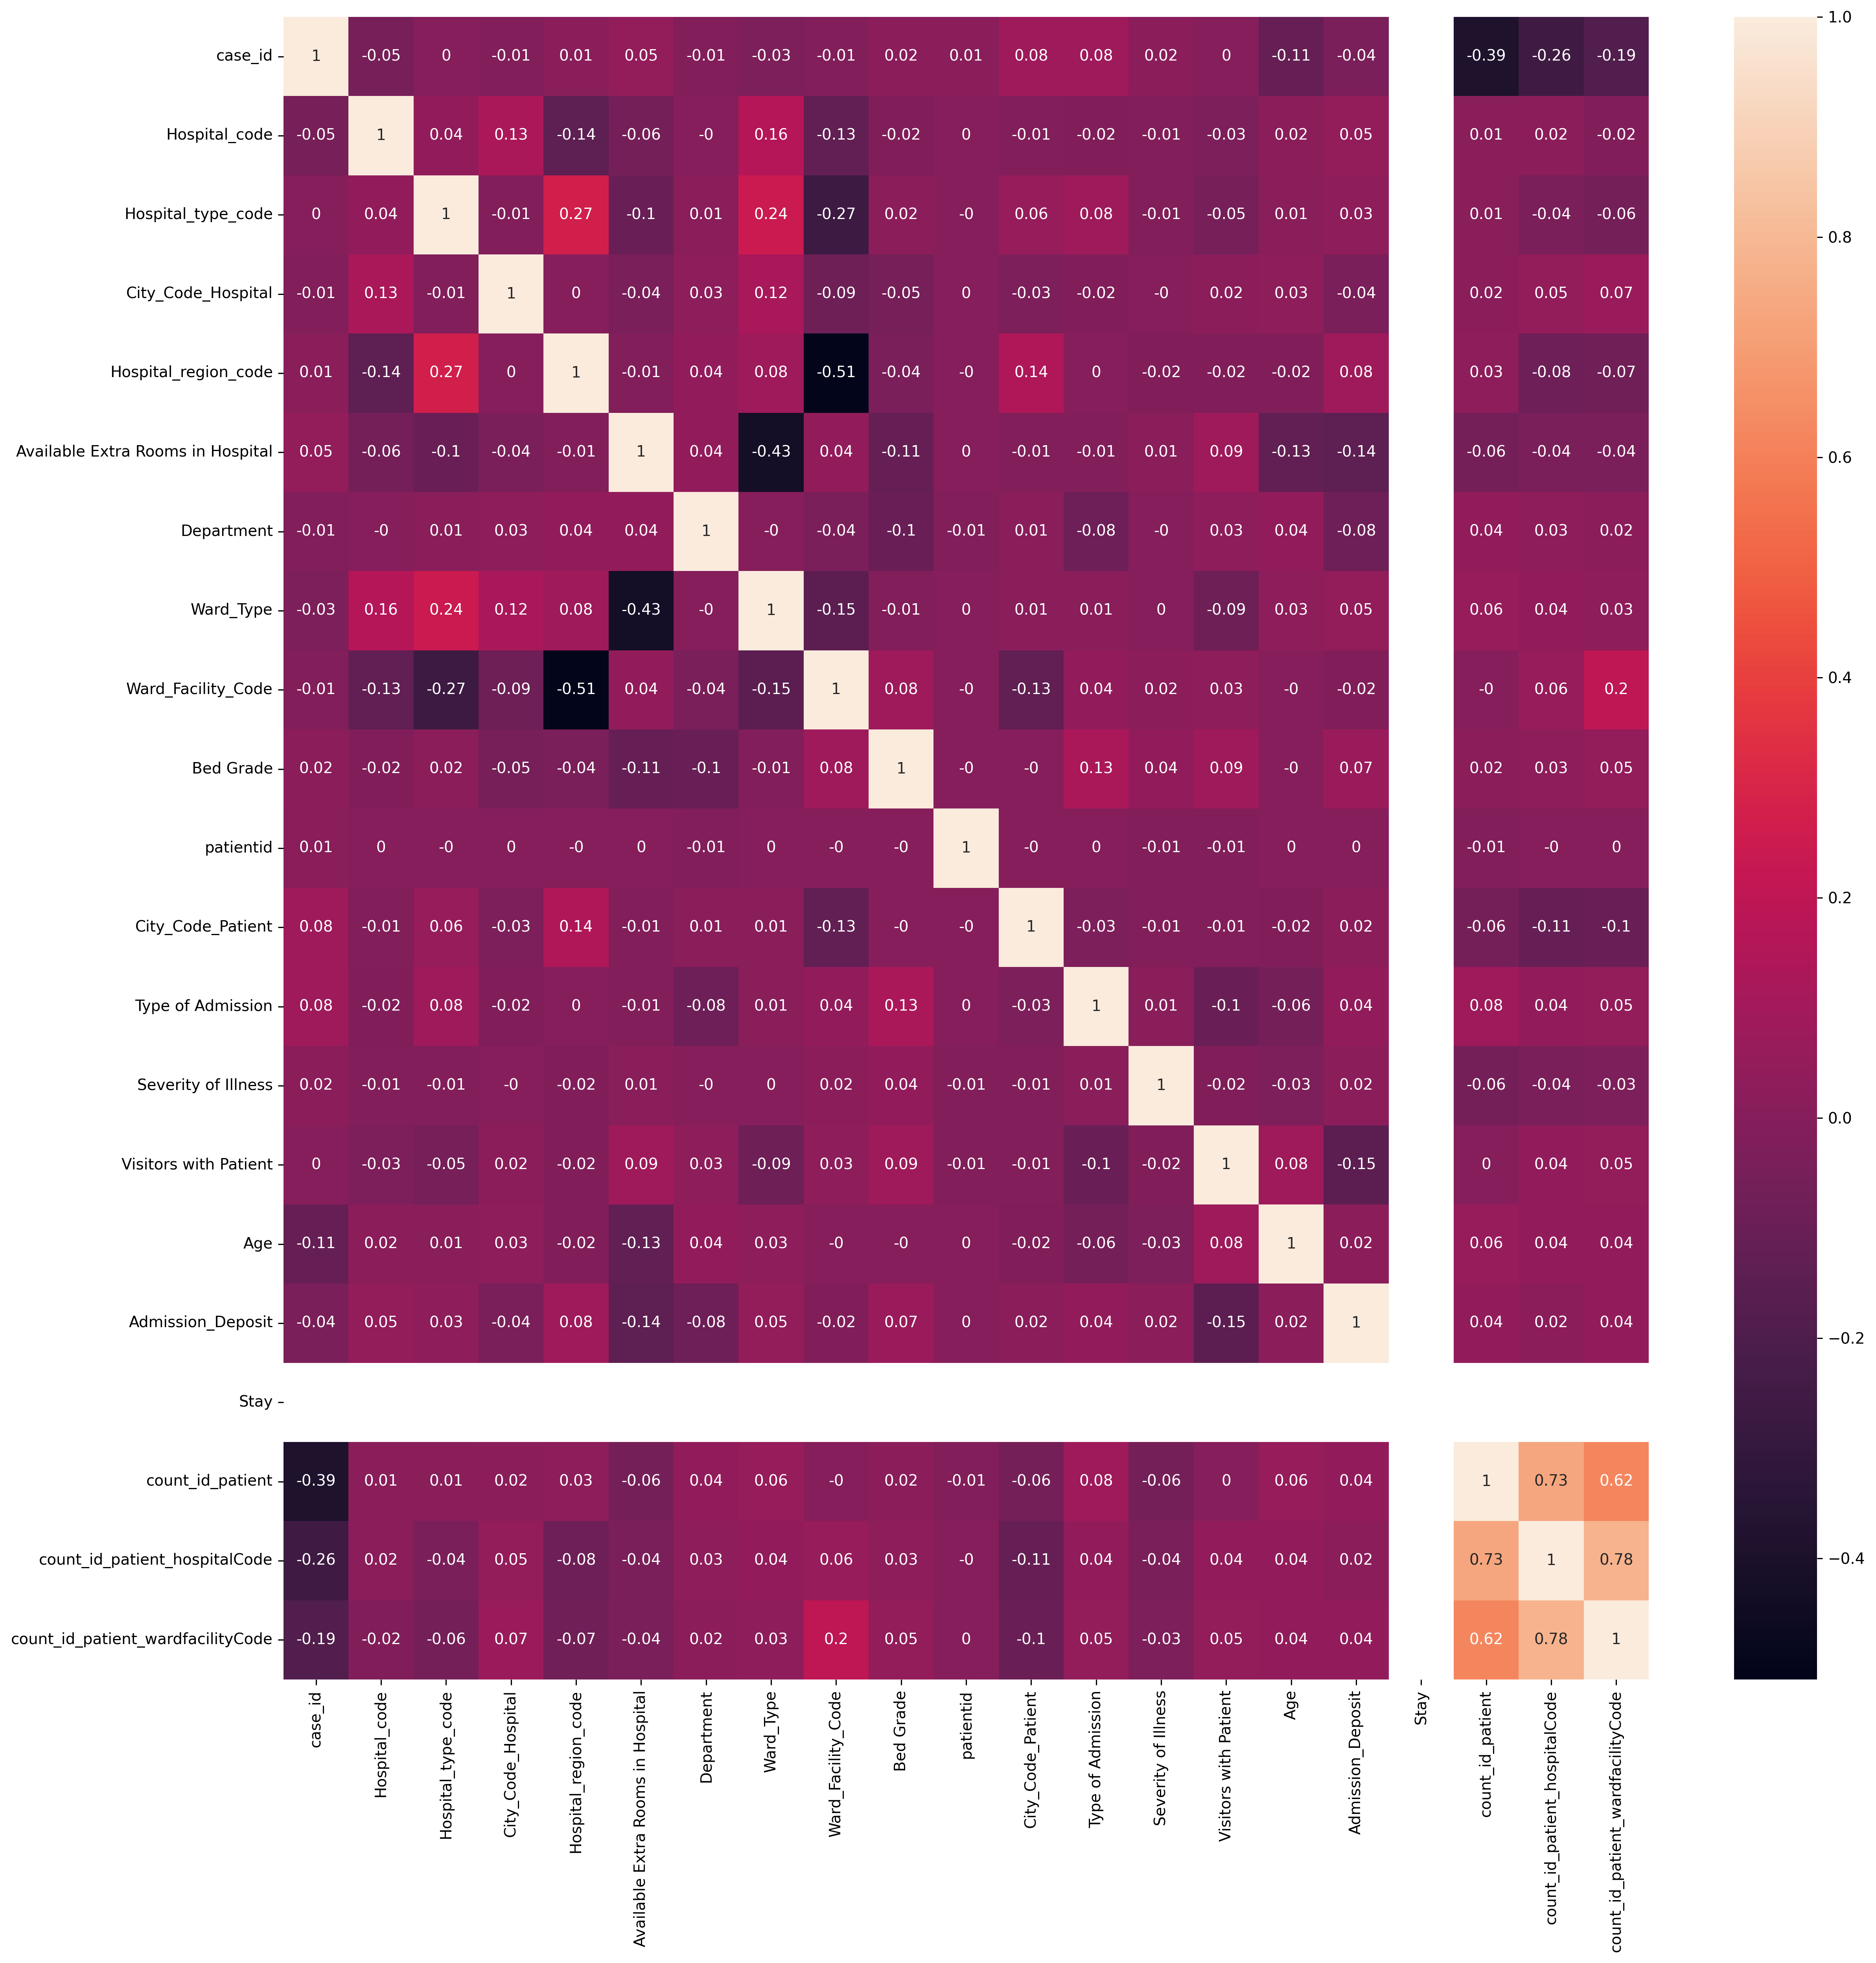

In [29]:
import seaborn as sns
fig = plt.figure(figsize=(20,20), dpi = 280)
sns.heatmap(matrix, annot=True)
plt.show()

Analysis from the above correlation matrix

1. Count id of the patients in hospital is positively correlated with stay.

2. No of visitors with patients is not correlated with stay.

# Models

# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier 
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)
y_pred_dtree=dtree.predict(X_test)

# Accuracy

In [523]:
from sklearn.metrics import accuracy_score
acc_score_dtree = accuracy_score(y_pred_dtree,y_test)
print("Accuracy:", acc_score_dtree*100)

Accuracy: 84.62185878086669


In [527]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dtree)
print(cm)

[[16847   262   204   120    23    37    10     5     0     4     4]
 [ 1677  7612  4179  2054   652   790   142   232    54    55    63]
 [ 1492  4584  6114  2692  1106   734   204   206    93    64    70]
 [  426  1410  1697 11587   382  1236    93   365    89    80   123]
 [    0     7    21     6 17551     3     0     2     0     0     0]
 [   67   256   241   613    79 15604    33   272   111    84    89]
 [    0     0     0     0     0     0 17468     0     0     0     0]
 [    0     1     0     0     0     0     0 17427     2     0     0]
 [    0     0     0     0     0     0     0     0 17535     0     0]
 [    0     0     0     0     0     0     0     0     0 17568     0]
 [    0     0     0     0     0     0     0     0     0     0 17568]]


# Evaluation of metrics and hyperparameter tuning for effective results

# Accuracy metric

In [533]:
from sklearn.model_selection import GridSearchCV
score_measure = 'accuracy'
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40,60], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01,0.05], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionTree = gridSearch.best_estimator_

accuracy score:  0.8273236180382376
parameters:  {'max_depth': 40, 'min_impurity_decrease': 0, 'min_samples_split': 2}


# Precision 

In [534]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import precision_score, make_scorer

p1 = make_scorer(precision_score , average='macro')
Dtc = DecisionTreeClassifier(random_state=1)
params = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
clf_prec = GridSearchCV(estimator=Dtc,param_grid=params, cv=5,n_jobs=5,verbose=1,scoring=p1 )
clf_prec.fit(X_train,y_train)
print(clf_prec.best_params_)
print("Precision Score :" , clf_prec.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'max_depth': 40, 'min_impurity_decrease': 0, 'min_samples_split': 2}
Precision Score : 0.8090451898135171


# Recall metric

In [535]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import recall_score, make_scorer

r1 = make_scorer(recall_score , average='macro')
Dtc = DecisionTreeClassifier(random_state=1)
params = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
clf_rec = GridSearchCV(estimator=Dtc,param_grid=params, cv=5,n_jobs=5,verbose=1,scoring=r1 )
clf_rec.fit(X_train,y_train)
print(clf_rec.best_params_)
print("Recall Score :",clf_rec.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'max_depth': 40, 'min_impurity_decrease': 0, 'min_samples_split': 2}
Recall Score : 0.8274480485796369


# F1 SCORE

In [536]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')
Dtc = DecisionTreeClassifier(random_state=1)
params = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
clf = GridSearchCV(estimator=Dtc,param_grid=params, cv=5,n_jobs=5,verbose=1,scoring=f1 )
clf.fit(X_train,y_train)
print(clf.best_params_)
print("f1 Score :",clf.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'max_depth': 40, 'min_impurity_decrease': 0, 'min_samples_split': 2}
f1 Score : 0.8155371349071651


In [537]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89     17516
           1       0.54      0.43      0.48     17510
           2       0.49      0.35      0.41     17359
           3       0.68      0.66      0.67     17488
           4       0.89      1.00      0.94     17590
           5       0.85      0.89      0.87     17449
           6       0.97      1.00      0.99     17468
           7       0.94      1.00      0.97     17430
           8       0.98      1.00      0.99     17535
           9       0.98      1.00      0.99     17568
          10       0.98      1.00      0.99     17568

    accuracy                           0.85    192481
   macro avg       0.83      0.85      0.84    192481
weighted avg       0.83      0.85      0.84    192481



# KNN MODEL

# What is the best way to choose K in KNN?
In KNN, finding the value of k is not easy. 

1.A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. 

2.Data scientists usually choose as an odd number if the number of classes is 2 and another simple approach to select k is set k=sqrt(n)

In [482]:
# For selecting  the no of neighbours we are finding the sqaure root.
import math 
print(math.sqrt(train.shape[0]))


564.3031100392767


In [483]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(564)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [485]:
from sklearn.metrics import accuracy_score
acc_score_knn = accuracy_score(y_pred_knn,y_test)
print("Accuracy:", acc_score_knn*100)

Accuracy: 30.42949693736005


# Evaluation of metrics and hyperparametertuning

# Accuracy 

In [66]:

from sklearn.model_selection import GridSearchCV 
score_measure = 'accuracy'
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,564,100)),
    'metric': ['euclidean', 'cosine']
}
gridSearch_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_knn.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch_knn.best_score_)
print('parameters: ', gridSearch_knn.best_params_)

bestAccuracyKnn = gridSearch_knn.best_estimator_

accuracy score:  0.20988112280575386
parameters:  {'metric': 'cosine', 'n_neighbors': 101}


# Precision

In [69]:
from sklearn.metrics import precision_score, make_scorer

p1 = make_scorer(precision_score , average='macro')
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1,564,100)),
    'metric': ['euclidean', 'cosine']
         } 
knn_prec = GridSearchCV(estimator=knn,param_grid=params, cv=5,n_jobs=5,verbose=1,scoring=p1 )
knn_prec.fit(X_train,y_train)
print(knn_prec.best_params_)
print("Precision Score :" , knn_prec.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'metric': 'cosine', 'n_neighbors': 101}
Precision Score : 0.2058039811670101


# Recall

In [70]:
from sklearn.metrics import recall_score, make_scorer

r1 = make_scorer(recall_score , average='macro')
knn = KNeighborsClassifier()
params = { 'n_neighbors': list(range(1,564,100)),
    'metric': ['euclidean', 'cosine']
         } 
knn_rec = GridSearchCV(estimator=knn,param_grid=params, cv=5,n_jobs=5,verbose=1,scoring=r1 )
knn_rec.fit(X_train,y_train)
print(knn_rec.best_params_)
print("Recall Score :",knn_rec.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'metric': 'cosine', 'n_neighbors': 101}
Recall Score : 0.20959300017248292


# F1 score

In [77]:
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')
knn = KNeighborsClassifier()
params = { 'n_neighbors': list(range(1,564,100)),
    'metric': ['euclidean', 'cosine']
         } 
knn_f1 = GridSearchCV(estimator=knn,param_grid=params, cv=5,n_jobs=5,verbose=1,scoring=f1 )
knn_f1.fit(X_train,y_train)
print(knn_f1.best_params_)
print("f1 Score :",knn_f1.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'metric': 'cosine', 'n_neighbors': 101}
f1 Score : 0.2040875056087695


In [121]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.10      0.05      0.07       532
           1       0.11      0.18      0.14       540
           2       0.12      0.31      0.17       554
           3       0.13      0.05      0.08       576
           4       0.12      0.08      0.09       571
           5       0.12      0.11      0.12       553
           6       0.13      0.07      0.09       583
           7       0.09      0.05      0.06       515
           8       0.16      0.22      0.18       555
           9       0.08      0.02      0.03       536
          10       0.16      0.22      0.18       522

    accuracy                           0.12      6037
   macro avg       0.12      0.12      0.11      6037
weighted avg       0.12      0.12      0.11      6037



# Random Forest

In [486]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(random_state=1)
rforest.fit(X_train,y_train)
y_pred_rf= rforest.predict(X_test)

In [487]:
from sklearn.metrics import accuracy_score
acc_score_rf = accuracy_score(y_pred_rf,y_test)
print("Accuracy:", acc_score_rf*100)

Accuracy: 87.47201022438578


# Evaluation of metrics and hyperparametertuning

# Accuracy

In [78]:
score_measure = 'accuracy'
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'n_estimators':[15],
}
gridSearch_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_rf.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch_rf.best_score_)
print('parameters: ', gridSearch_rf.best_params_)

bestAccuracyTree = gridSearch_rf.best_estimator_

accuracy score:  0.30475831190696995
parameters:  {'max_depth': 40, 'min_impurity_decrease': 0, 'min_samples_split': 40, 'n_estimators': 15}


# Precision

In [79]:
from sklearn.metrics import precision_score, make_scorer
p1 = make_scorer(precision_score , average='macro')
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'n_estimators':[15],
}
gridSearch_rfprec = GridSearchCV(RandomForestClassifier(), param_grid, cv=k_fold, scoring=p1,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_rfprec.fit(X_train, y_train)
print("Precision Score :",gridSearch_rfprec.best_score_)
print('parameters: ', gridSearch_rfprec.best_params_)

bestPrecisionTree = gridSearch_rfprec.best_estimator_

Precision Score : 0.29096430234271586
parameters:  {'max_depth': 30, 'min_impurity_decrease': 0, 'min_samples_split': 100, 'n_estimators': 15}


# Recall

In [80]:
from sklearn.metrics import recall_score, make_scorer
r1 = make_scorer(recall_score , average='macro')
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'n_estimators':[15],
}
gridSearch_rfrec = GridSearchCV(RandomForestClassifier(), param_grid, cv=k_fold, scoring=r1,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_rfrec.fit(X_train, y_train)
print("Recall Score :",gridSearch_rfrec.best_score_)
print('parameters: ', gridSearch_rfrec.best_params_)

bestRecallTree = gridSearch_rfrec.best_estimator_

Recall Score : 0.301280817212931
parameters:  {'max_depth': 40, 'min_impurity_decrease': 0, 'min_samples_split': 40, 'n_estimators': 15}


# F1 SCORE

In [83]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')
Dtc = RandomForestClassifier()
params = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
rff1 = GridSearchCV(estimator=Dtc,param_grid=params, cv=5,n_jobs=5,verbose=1,scoring=f1 )
rff1.fit(X_train,y_train)
print(rff1.best_params_)
print("f1 Score :",rff1.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_split': 5}
f1 Score : 0.30673251921274197


In [122]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.33      0.47      0.39       532
           1       0.24      0.28      0.26       540
           2       0.21      0.26      0.23       554
           3       0.17      0.09      0.12       576
           4       0.23      0.22      0.22       571
           5       0.23      0.21      0.22       553
           6       0.24      0.17      0.20       583
           7       0.24      0.23      0.23       515
           8       0.49      0.63      0.55       555
           9       0.35      0.34      0.35       536
          10       0.52      0.49      0.50       522

    accuracy                           0.30      6037
   macro avg       0.30      0.31      0.30      6037
weighted avg       0.29      0.30      0.30      6037



# Adaboost classifier

In [488]:
from sklearn.ensemble import  AdaBoostClassifier
aboost = AdaBoostClassifier(random_state=1)
aboost.fit(X_train,y_train)
y_pred_adaboost = aboost.predict(X_test)

# Accuracy

In [490]:
from sklearn.metrics import accuracy_score
acc_score_adaboost = accuracy_score(y_pred_adaboost,y_test)
print("Accuracy:", acc_score_adaboost*100)

Accuracy: 25.55524960905232


# Evaluation of metrics and hyper parameter tuning

# Accuracy

In [86]:
score_measure = 'accuracy'
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
   
    'n_estimators': [11, 12, 20, 30, 50, 100, 150, 200],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],    
    'algorithm': ['SAMME', 'SAMME.R'], 
}
gridSearch_adb = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_adb.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch_adb.best_score_)
print('parameters: ', gridSearch_adb.best_params_)

bestRecallTree = gridSearch_adb.best_estimator_

accuracy score:  0.25485578631859707
parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.98, 'n_estimators': 100}


# Precision

In [88]:
from sklearn.metrics import precision_score, make_scorer
p1 = make_scorer(precision_score , average='macro')
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
     'n_estimators': [11, 12, 20, 30, 50, 100, 150, 200],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],    
    'algorithm': ['SAMME', 'SAMME.R'], 
}
gridSearch_adbpre = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid, cv=k_fold, scoring=p1,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_adbpre.fit(X_train, y_train)
print("Precision Score :",gridSearch_adbpre.best_score_)
print('parameters: ', gridSearch_adbpre.best_params_)

bestPrecisionTree = gridSearch_adbpre.best_estimator_

Precision Score : 0.24508445455042321
parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.98, 'n_estimators': 100}


# Recall

In [89]:
from sklearn.metrics import recall_score, make_scorer
r1 = make_scorer(recall_score , average='macro')
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
    'n_estimators': [11, 12, 20, 30, 50, 100, 150, 200],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],    
    'algorithm': ['SAMME', 'SAMME.R'], 
}
gridSearch_adbrec = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid, cv=k_fold, scoring=r1,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_adbrec.fit(X_train, y_train)
print("Recall Score :",gridSearch_adbrec.best_score_)
print('parameters: ', gridSearch_adbrec.best_params_)

bestRecallTree = gridSearch_adbrec.best_estimator_

Recall Score : 0.2542171254255924
parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.98, 'n_estimators': 100}


# F1 SCORE

In [90]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')
Dtc = AdaBoostClassifier(random_state=1)
params = {
    'n_estimators': [11, 12, 20, 30, 50, 100, 150, 200],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],    
    'algorithm': ['SAMME', 'SAMME.R'], 
}
gridsearch_adbf1 = GridSearchCV(estimator=Dtc,param_grid=params, cv=5,n_jobs=5,verbose=1,scoring=f1 )
gridsearch_adbf1.fit(X_train,y_train)
print(gridsearch_adbf1.best_params_)
print("f1 Score :",gridsearch_adbf1.best_score_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'algorithm': 'SAMME.R', 'learning_rate': 0.98, 'n_estimators': 100}
f1 Score : 0.24248776879667044


In [123]:
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.25      0.49      0.33       532
           1       0.25      0.28      0.26       540
           2       0.21      0.20      0.20       554
           3       0.12      0.07      0.09       576
           4       0.24      0.17      0.20       571
           5       0.22      0.16      0.18       553
           6       0.21      0.17      0.18       583
           7       0.19      0.18      0.19       515
           8       0.28      0.38      0.32       555
           9       0.26      0.17      0.21       536
          10       0.36      0.41      0.38       522

    accuracy                           0.24      6037
   macro avg       0.23      0.24      0.23      6037
weighted avg       0.23      0.24      0.23      6037



# Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier(random_state=1)
gboost.fit(X_train,y_train)
y_pred_gboost = gboost.predict(X_test)

# Accuracy

In [38]:
from sklearn.metrics import accuracy_score
acc_score_gb = accuracy_score(y_pred_gboost,y_test)
print("Accuracy:", acc_score_gb*100)

Accuracy: 33.67189488832664


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gboost)
print(cm)

[[ 9424  3665  1919    86  1607    21   734    15     1    24    20]
 [ 4378  6261  3015   269  1692   586   742   234   164   141    28]
 [ 3129  3720  5646   162  2997   157  1227    71   162    60    28]
 [ 1941  2032  2789   649  2531  2980  1195  1471  1051   720   129]
 [ 2472  1845  3322   200  5315   745  2162   529   440   411   149]
 [ 1002   711   868   477   798  4694   714  3081  3008  1739   357]
 [ 1584  1190  2234   198  3483   980  4191   923  1486   612   587]
 [  777   540   549   385   678  3085   781  4041  2348  2671  1575]
 [  596   291   170    91   257  1061   455   803 11784   607  1420]
 [  538   524   488   188   722  2165   788  3184  1917  5163  1891]
 [  592   292   195    74   230   687   454   973  4971  1456  7644]]


# Evalution of metrics and hyper parameter tuning

# Accuracy

In [94]:
score_measure = 'accuracy'
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [ 20, 30, 40], 
    'min_samples_split': [ 60, 80, 100], 
    'min_impurity_decrease': [0.001, 0.005, 0.01], 
    'n_estimators': [11, 12],
    'learning_rate': [0.1,0.2],    
}
gridSearch_gboost = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_gboost.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch_gboost.best_score_)
print('parameters: ', gridSearch_gboost.best_params_)

bestaccuracyTree = gridSearch_gboost.best_estimator_

accuracy score:  0.28889714359457846
parameters:  {'learning_rate': 0.1, 'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_split': 80, 'n_estimators': 12}


# Precision

In [95]:
from sklearn.metrics import precision_score, make_scorer
p1 = make_scorer(precision_score , average='macro')
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
     'max_depth': [ 20, 30, 40], 
    'min_samples_split': [ 60, 80, 100], 
    'min_impurity_decrease': [0.001, 0.005, 0.01], 
    'n_estimators': [11, 12],
    'learning_rate': [0.1,0.2]
}
gridSearch_gbpre = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=k_fold, scoring=p1,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_gbpre.fit(X_train, y_train)
print("Precision Score :",gridSearch_gbpre.best_score_)
print('parameters: ', gridSearch_gbpre.best_params_)

bestPrecisionTree = gridSearch_gbpre.best_estimator_

Precision Score : 0.28104174417878325
parameters:  {'learning_rate': 0.2, 'max_depth': 30, 'min_impurity_decrease': 0.01, 'min_samples_split': 100, 'n_estimators': 12}


# Recall

In [96]:
from sklearn.metrics import recall_score, make_scorer
r1 = make_scorer(recall_score , average='macro')
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
     'max_depth': [ 20, 30, 40], 
    'min_samples_split': [ 60, 80, 100], 
    'min_impurity_decrease': [0.001, 0.005, 0.01], 
    'n_estimators': [11, 12],
    'learning_rate': [0.1,0.2]  
}
gridSearch_gbrec = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=k_fold, scoring=r1,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_gbrec.fit(X_train, y_train)
print("Recall Score :",gridSearch_gbrec.best_score_)
print('parameters: ', gridSearch_gbrec.best_params_)

bestRecallTree = gridSearch_gbrec.best_estimator_

Recall Score : 0.2883494689273771
parameters:  {'learning_rate': 0.1, 'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_split': 80, 'n_estimators': 12}


# F1 SCORE

In [97]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')
Dtc = GradientBoostingClassifier(random_state=1)
params = {
    'max_depth': [ 20, 30, 40], 
    'min_samples_split': [ 60, 80, 100], 
    'min_impurity_decrease': [0.001, 0.005, 0.01], 
    'n_estimators': [11, 12],
    'learning_rate': [0.1,0.2] 
     
}
gridsearchcv_gbf1 = GridSearchCV(estimator=Dtc,param_grid=params, cv=5,n_jobs=5,verbose=1,scoring=f1 )
gridsearchcv_gbf1.fit(X_train,y_train)
print(gridsearchcv_gbf1.best_params_)
print("f1 Score :",gridsearchcv_gbf1.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'learning_rate': 0.2, 'max_depth': 30, 'min_impurity_decrease': 0.01, 'min_samples_split': 100, 'n_estimators': 12}
f1 Score : 0.2819225070119202


In [124]:
print(classification_report(y_test, y_pred_gboost))

              precision    recall  f1-score   support

           0       0.33      0.50      0.39       532
           1       0.25      0.34      0.29       540
           2       0.24      0.31      0.27       554
           3       0.18      0.03      0.05       576
           4       0.26      0.29      0.27       571
           5       0.24      0.22      0.23       553
           6       0.24      0.15      0.19       583
           7       0.19      0.18      0.19       515
           8       0.42      0.65      0.51       555
           9       0.33      0.28      0.31       536
          10       0.51      0.40      0.45       522

    accuracy                           0.30      6037
   macro avg       0.29      0.30      0.29      6037
weighted avg       0.29      0.30      0.28      6037



# XGBOOST

In [553]:
import xgboost
classifier_xgb = xgboost.XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=800,
                                  objective='multi:softmax', reg_alpha=0.5, reg_lambda=1.5,
                                  booster='gbtree', n_jobs=4, min_child_weight=2, base_score= 0.75)

In [555]:
model_xgb = classifier_xgb.fit(X_train, y_train)

# Accuracy

In [556]:
from sklearn.metrics import accuracy_score
prediction_xgb = model_xgb.predict(X_test)
acc_score_xgb = accuracy_score(prediction_xgb,y_test)
print("Accuracy:", acc_score_xgb*100)

Accuracy: 43.6261241369278


# Evalution of metrics and hyper parameter tuning

# Accuracy

In [557]:
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier
score_measure = 'accuracy'
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
      'max_depth': [3, 4, 5, 6, 7],     
    'n_estimators' : [1, 2, 4, 8],
     'learning_rate': [0.2], 
    'subsample': [0.5],
    'colsample_bytree':[0.5] 
}
gridSearch_xgb = GridSearchCV(XGBClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_xgb.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch_xgb.best_score_)
print('parameters: ', gridSearch_xgb.best_params_)

bestAccuracyTree = gridSearch_xgb.best_estimator_

accuracy score:  0.3493583748960931
parameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 8, 'subsample': 0.5}


# Precision

In [558]:
from sklearn.metrics import precision_score, make_scorer
p1 = make_scorer(precision_score , average='macro')
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
     'max_depth': [3, 4, 5, 6, 7],     
    'n_estimators' : [1, 2, 4, 8],
     'learning_rate': [0.2], 
    'subsample': [0.5],
    'colsample_bytree':[0.5] 
}
gridSearch_pre = GridSearchCV(XGBClassifier(random_state=1), param_grid, cv=k_fold, scoring=p1,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_pre.fit(X_train, y_train)
print("Precision Score :",gridSearch_pre.best_score_)
print('parameters: ', gridSearch_pre.best_params_)

bestPrecisionTree = gridSearch_pre.best_estimator_

Precision Score : 0.35573122278224906
parameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 8, 'subsample': 0.5}


# Recall

In [559]:
from sklearn.metrics import recall_score, make_scorer
r1 = make_scorer(recall_score , average='macro')
k_fold = 5
# Start with an initial guess for parameters
param_grid = {
     'max_depth': [3, 4, 5, 6, 7],     
    'n_estimators' : [1, 2, 4, 8],
     'learning_rate': [0.2], 
    'subsample': [0.5],
    'colsample_bytree':[0.5] 
}
gridSearch_rec = GridSearchCV(XGBClassifier(random_state=1), param_grid, cv=k_fold, scoring=r1,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch_rec.fit(X_train, y_train)
print("Recall Score :",gridSearch_rec.best_score_)
print('parameters: ', gridSearch_rec.best_params_)

bestRecallTree = gridSearch_rec.best_estimator_

Recall Score : 0.3494020318613107
parameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 8, 'subsample': 0.5}


# F1 SCORE

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score, make_scorer
from xgboost import XGBClassifier

f1 = make_scorer(f1_score , average='macro')
xgb_f1 = XGBClassifier()
params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],     
    'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],      
    'learning_rate': np.arange(0.0005,0.3,0.0005),   
    'subsample': np.arange(0.01,1.0,0.01),
    'colsample_bytree': np.arange(0.1,1.0,0.01)
        
   
}
gridsearch_xgbf1= GridSearchCV(estimator=xgb_f1,param_grid=params, cv=5,n_jobs=5,verbose=1,scoring=f1 )
gridsearch_xgbf1.fit(X_train,y_train)
print(gridsearch_xgbf1.best_params_)
print("f1 Score :",gridsearch_xgbf1.best_score_)

# Artificial Neural Network

In [128]:
! pip install keras

In [130]:
! pip install tensorflow

# MLP CLASSIFIER

In [544]:
from sklearn.neural_network import MLPClassifier


ann = MLPClassifier(hidden_layer_sizes=(200,150,90), solver='adam', max_iter=200)
ann_fit= ann.fit(X_train,y_train)

In [545]:
y_pred_ann = ann.predict(X_test)

# Accuracy

In [546]:
acc_score_ann = accuracy_score(y_pred_ann,y_test)
print("Accuracy:", acc_score_ann*100)

Accuracy: 60.682872595217184


In [552]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.44      0.56      0.49     17516
           1       0.34      0.26      0.29     17510
           2       0.29      0.33      0.31     17359
           3       0.30      0.15      0.20     17488
           4       0.39      0.50      0.44     17590
           5       0.43      0.34      0.38     17449
           6       0.94      0.99      0.96     17468
           7       0.57      0.60      0.59     17430
           8       0.93      0.98      0.96     17535
           9       0.94      1.00      0.97     17568
          10       0.92      0.97      0.94     17568

    accuracy                           0.61    192481
   macro avg       0.59      0.61      0.59    192481
weighted avg       0.59      0.61      0.59    192481



In [548]:
ann1 = MLPClassifier(hidden_layer_sizes=(400,300,100), solver='adam', max_iter=200)
ann_fit1= ann.fit(X_train,y_train)

In [549]:
y_pred_ann1 = ann.predict(X_test)

# Accuracy

In [550]:
acc_score_ann1 = accuracy_score(y_pred_ann1,y_test)
print("Accuracy:", acc_score_ann1*100)

Accuracy: 60.00644219429451


In [551]:
print(classification_report(y_test, y_pred_ann1))

              precision    recall  f1-score   support

           0       0.44      0.56      0.49     17516
           1       0.34      0.20      0.25     17510
           2       0.27      0.40      0.33     17359
           3       0.37      0.07      0.12     17488
           4       0.37      0.49      0.42     17590
           5       0.42      0.37      0.39     17449
           6       0.92      0.98      0.95     17468
           7       0.55      0.60      0.58     17430
           8       0.92      0.98      0.95     17535
           9       0.96      0.98      0.97     17568
          10       0.92      0.96      0.94     17568

    accuracy                           0.60    192481
   macro avg       0.59      0.60      0.58    192481
weighted avg       0.59      0.60      0.58    192481

